### Capstone project WK2 - Clustering Moscow using K-mean algorithm

In [1]:
import requests
import pandas as pd
import csv
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


THe data that is used below has been collected from https://en.wikipedia.org/wiki/List_of_Moscow_Metro_station and Foursquar API (The code is stored in github for Capstone WK1 - https://github.com/Sargylana/Clustering_Moscow_Data/blob/master/IBM%20Moscow_Data.ipynb)

In [2]:
md = pd.read_csv(r'C:\Users\Anton\Dropbox\Sargy\#Education\#COURSERA\IBM\moscow_venues_26JAN2020.csv', index_col='Index_Col')

In [3]:
md.head(5)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Index_Col,,,,,,,
0,Aeroport,55.800278,37.532778,Cosmic Latte,55.799551,37.534983,Coffee Shop
1,Aeroport,55.800278,37.532778,Кружовник,55.800497,37.530579,Flower Shop
2,Aeroport,55.800278,37.532778,Кофейная кантата,55.801443,37.531447,Food & Drink Shop
3,Aeroport,55.800278,37.532778,Кулинарная лавка братьев Караваевых,55.801790,37.532737,Deli / Bodega
4,Aeroport,55.800278,37.532778,Marukame (Марукамэ),55.799589,37.532348,Udon Restaurant


Initial data contains 232 Moscow Subway (Metro) stations and 375 unique categories, such as Cosmetics Shop, Fast Food Restaurant, Gym / Fitness Center, Art Gallery, Pet Store, Vietnamese Restaurant, Auto Workshop, Candy Store, Mobile Phone Shop, Park, Coffee Shop, Bookstore etc.

In [4]:
print('There are {} uniques categories.'.format(len(md['Venue Category'].unique())))

There are 375 uniques categories.


In [5]:
print('There are {} uniques stations.'.format(len(md['Neighborhood'].unique())))

There are 232 uniques stations.


In [6]:
md.shape

(7856, 7)

In [7]:
md['Neighborhood'].count()

7856

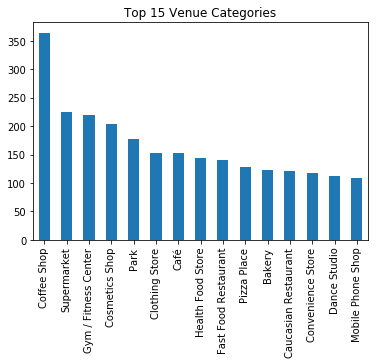

In [8]:
md['Venue Category'].value_counts().head(15).plot(kind='bar', title='Top 15 Venue Categories')

In [9]:
md['Venue Category'].value_counts()[md['Venue Category'].value_counts()<7].count()

186

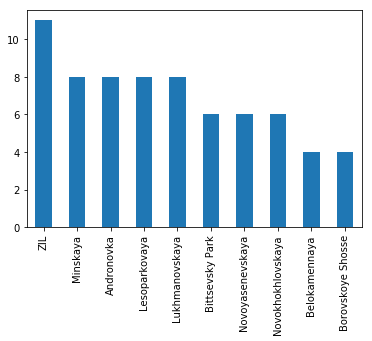

In [10]:
md['Neighborhood'].value_counts().tail(10).plot(kind='bar')

In [11]:
md['Venue Category'].count()

7856

There are stations with just few registered venues in Foursquare. These stations are surrounded mostly by park, field, and forest. These are not considerable for opening the Coffee Shop; hence these are filtered out for further analysis.

In [12]:
Filter_Neighborhood = md['Neighborhood'].value_counts()[md['Neighborhood'].value_counts()<10].index.to_list()
Filter_Neighborhood 

['Minskaya',
 'Andronovka',
 'Lesoparkovaya',
 'Lukhmanovskaya',
 'Bittsevsky Park',
 'Novoyasenevskaya',
 'Novokhokhlovskaya',
 'Belokamennaya',
 'Borovskoye Shosse']

In [13]:
md_filtered=md[~md['Neighborhood'].isin(Filter_Neighborhood)].reset_index()

In [14]:
md_filtered.shape

(7798, 8)

Also, some Venue Categories are very rare - these are filtered out for further analysis as well.

In [15]:
Filter_Category=md['Venue Category'].value_counts()[md['Venue Category'].value_counts()<10].index.to_list()
Filter_Category[0:5]

['Gas Station',
 'Go Kart Track',
 'Theme Park',
 'Fried Chicken Joint',
 'Optical Shop']

In [16]:
md_filtered_=md_filtered[~md_filtered['Venue Category'].isin(Filter_Category)].reset_index().drop('Index_Col',1).drop('index',1)

In [17]:
md_filtered_.shape

(7084, 7)

In [18]:
md_filtered_.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aeroport,55.800278,37.532778,Cosmic Latte,55.799551,37.534983,Coffee Shop
1,Aeroport,55.800278,37.532778,Кружовник,55.800497,37.530579,Flower Shop
2,Aeroport,55.800278,37.532778,Кофейная кантата,55.801443,37.531447,Food & Drink Shop
3,Aeroport,55.800278,37.532778,Кулинарная лавка братьев Караваевых,55.801790,37.532737,Deli / Bodega
4,Aeroport,55.800278,37.532778,Mcdonalds's,55.801974,37.532372,Fast Food Restaurant


In [19]:
md2 = md_filtered_[md_filtered_.columns[:3]]  
md2=md2.drop_duplicates().reset_index()
md2=md2.drop('index', axis=1)
md2.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude
0,Aeroport,55.800278,37.532778
1,Akademicheskaya,55.687778,37.573333
2,Aleksandrovsky Sad,55.752500,37.608611
3,Alekseyevskaya,55.808889,37.638889
4,Alma-Atinskaya,55.632500,37.766111


In [20]:
print('There are {} uniques categories.'.format(len(md2['Neighborhood'].unique())))

There are 223 uniques categories.


In [21]:
print('There are {} uniques categories.'.format(len(md_filtered_['Venue Category'].unique())))

There are 158 uniques categories.


In [22]:
md2.shape

(223, 3)

In [23]:
md_filtered_.shape

(7084, 7)

In [24]:
md_filtered_=md_filtered_.reset_index()

In [25]:
md_onehot = pd.get_dummies(md_filtered_[['Venue Category']], prefix="", prefix_sep="")
md_onehot['Neighborhood'] = md_filtered_['Neighborhood'] 

In [26]:
md_onehot.shape

(7084, 159)

In [28]:
fixed_columns = [md_onehot.columns[158]] + list(md_onehot.columns[:158])+list(md_onehot.columns[159:])
md_onehot = md_onehot[fixed_columns]
md_onehot.head()

,Zoo Exhibit,Neighborhood,Accessories Store,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,...,Theater,Toy / Game Store,Trail,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,0,Aeroport,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,Aeroport,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,Aeroport,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,Aeroport,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,Aeroport,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
md_onehot.shape

(7084, 159)

In [30]:
md_grouped = md_onehot.groupby('Neighborhood').mean().reset_index()
md_grouped.shape

(223, 159)

In [31]:
md_grouped.head()

,Neighborhood,Zoo Exhibit,Accessories Store,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,...,Theater,Toy / Game Store,Trail,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Aeroport,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.027778,...,0.0,0.000000,0.0,0.027778,0.0,0.0,0.000000,0.000000,0.0,0.0
1,Akademicheskaya,0.0,0.0,0.000000,0.000000,0.0,0.026316,0.0,0.0,0.000000,...,0.0,0.026316,0.0,0.026316,0.0,0.0,0.026316,0.026316,0.0,0.0
2,Aleksandrovsky Sad,0.0,0.0,0.000000,0.054054,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.027027,0.0,0.0,0.000000,0.000000,0.0,0.0
3,Alekseyevskaya,0.0,0.0,0.028571,0.000000,0.0,0.028571,0.0,0.0,0.057143,...,0.0,0.057143,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
4,Alma-Atinskaya,0.0,0.0,0.000000,0.000000,0.0,0.071429,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.071429,0.0,0.0


### Clustering

In [32]:
from sklearn.cluster import KMeans
import numpy as np

In [33]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [34]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = md_grouped['Neighborhood']

for ind in np.arange(md_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(md_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Aeroport,Coffee Shop,Cosmetics Shop,Pet Store,Gourmet Shop,Plaza
1,Akademicheskaya,Park,Beer Store,Coffee Shop,Health Food Store,Sushi Restaurant
2,Aleksandrovsky Sad,Plaza,Concert Hall,Park,Bakery,Restaurant
3,Alekseyevskaya,Coffee Shop,Furniture / Home Store,Health Food Store,Toy / Game Store,Hobby Shop
4,Alma-Atinskaya,Supermarket,Concert Hall,Convenience Store,Pharmacy,Cosmetics Shop


In [35]:
neighborhoods_venues_sorted.shape

(223, 6)

In [36]:
md_k = md_grouped.drop('Neighborhood', 1)
md_k.shape

(223, 158)

Defining the best k using KElbowVisualizer library

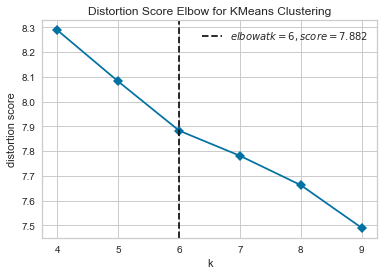

In [49]:
from sklearn.cluster import KMeans
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,10), timings=False)

visualizer.fit(md_k)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [50]:
kclusters = 6

md_grouped_clustering = md_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(md_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 5, 2, 1, 0, 5, 0, 2, 5, 1])

In [51]:
neighborhoods_venues_sorted.shape

(223, 6)

In [52]:
md2.shape

(223, 3)

In [53]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [54]:
md_merged = md2

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
md_merged = md_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

md_merged.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Aeroport,55.800278,37.532778,1,Coffee Shop,Cosmetics Shop,Pet Store,Gourmet Shop,Plaza
1,Akademicheskaya,55.687778,37.573333,5,Park,Beer Store,Coffee Shop,Health Food Store,Sushi Restaurant
2,Aleksandrovsky Sad,55.752500,37.608611,2,Plaza,Concert Hall,Park,Bakery,Restaurant
3,Alekseyevskaya,55.808889,37.638889,1,Coffee Shop,Furniture / Home Store,Health Food Store,Toy / Game Store,Hobby Shop
4,Alma-Atinskaya,55.632500,37.766111,0,Supermarket,Concert Hall,Convenience Store,Pharmacy,Cosmetics Shop


In [55]:
md_merged.shape

(223, 9)

In [56]:
md_merged.isnull().count()

Neighborhood              223
Neighborhood Latitude     223
Neighborhood Longitude    223
Cluster Labels            223
1st Most Common Venue     223
2nd Most Common Venue     223
3rd Most Common Venue     223
4th Most Common Venue     223
5th Most Common Venue     223
dtype: int64

In [57]:
md_merged =md_merged.dropna(subset=['Cluster Labels'])

In [58]:
md_merged.isnull().count()

Neighborhood              223
Neighborhood Latitude     223
Neighborhood Longitude    223
Cluster Labels            223
1st Most Common Venue     223
2nd Most Common Venue     223
3rd Most Common Venue     223
4th Most Common Venue     223
5th Most Common Venue     223
dtype: int64

In [59]:
print('There are {} stations'.format(len(md_merged['Neighborhood'].unique())))

There are 223 stations


## Results and Observation

In [60]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium

In [61]:
latitude=md_merged['Neighborhood Latitude'][0]
longitude = md_merged['Neighborhood Longitude'][0] 

In [62]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10, tiles='Stamen Terrain') #'Stamen Terrain'

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(md_merged['Neighborhood Latitude'], md_merged['Neighborhood Longitude'], md_merged['Neighborhood'], md_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters) 
map_clusters

In [63]:
md_merged.loc[md_merged['Cluster Labels']==0, md_merged.columns[[0]+list(range(3,md_merged.shape[1]))]].head()

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,Alma-Atinskaya,0,Supermarket,Concert Hall,Convenience Store,Pharmacy,Cosmetics Shop
6,Annino,0,Auto Workshop,Supermarket,Fast Food Restaurant,Baby Store,Shoe Store
10,Babushkinskaya,0,Supermarket,Gym / Fitness Center,Gym,Fast Food Restaurant,Cosmetics Shop
16,Belomorskaya,0,Coffee Shop,Pizza Place,Sporting Goods Shop,Supermarket,Arcade
21,Borisovo,0,Supermarket,Park,Convenience Store,Coffee Shop,Tennis Court


In [64]:
md_merged.loc[md_merged['Cluster Labels']==1, md_merged.columns[[0]+list(range(3,md_merged.shape[1]))]].head()

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Aeroport,1,Coffee Shop,Cosmetics Shop,Pet Store,Gourmet Shop,Plaza
3,Alekseyevskaya,1,Coffee Shop,Furniture / Home Store,Health Food Store,Toy / Game Store,Hobby Shop
9,Avtozavodskaya,1,Coffee Shop,Beer Store,Dance Studio,Brewery,Italian Restaurant
14,Baumanskaya,1,Coffee Shop,Dance Studio,Bar,Dessert Shop,Caucasian Restaurant
15,Begovaya,1,Coffee Shop,Hookah Bar,Supermarket,Convenience Store,Other Repair Shop


In [65]:
md_merged.loc[md_merged['Cluster Labels']==2, md_merged.columns[[0]+list(range(3,md_merged.shape[1]))]].head()

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,Aleksandrovsky Sad,2,Plaza,Concert Hall,Park,Bakery,Restaurant
7,Arbatskaya,2,Bakery,Concert Hall,Coffee Shop,Art Gallery,Bookstore
13,Barrikadnaya,2,Zoo Exhibit,Health Food Store,Bakery,Caucasian Restaurant,Park
17,Belorusskaya,2,Coffee Shop,Gym / Fitness Center,Seafood Restaurant,Steakhouse,Yoga Studio
20,Biblioteka Imeni Lenina,2,Plaza,Concert Hall,Art Gallery,History Museum,Coffee Shop


In [66]:
md_merged.loc[md_merged['Cluster Labels']==3, md_merged.columns[[0]+list(range(3,md_merged.shape[1]))]].head()

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
29,Butyrskaya,3,Café,Bus Stop,Flower Shop,Coffee Shop,Gift Shop
48,Govorovo,3,Bus Stop,Fast Food Restaurant,Coffee Shop,Baby Store,Performing Arts Venue
62,Koptevo,3,Bus Stop,Liquor Store,Auto Workshop,Café,Lake
81,Likhobory,3,Bus Stop,Pool,Butcher,Convenience Store,Beer Store
115,Ozyornaya,3,Café,Auto Workshop,Supermarket,Pizza Place,Pet Store


In [67]:
md_merged.loc[md_merged['Cluster Labels']==4, md_merged.columns[[0]+list(range(3,md_merged.shape[1]))]].head()

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
11,Bagrationovskaya,4,Electronics Store,Cosmetics Shop,Clothing Store,Other Repair Shop,Café
12,Baltiyskaya,4,Coffee Shop,Clothing Store,Cosmetics Shop,Lingerie Store,Sporting Goods Shop
18,Belyayevo,4,Coffee Shop,Cosmetics Shop,Gym,Mobile Phone Shop,Baby Store
19,Bibirevo,4,Fast Food Restaurant,Italian Restaurant,Clothing Store,Big Box Store,Farmers Market
27,Bulvar Rokossovskogo,4,Bus Line,Dance Studio,Convenience Store,Park,Pet Store


In [68]:
md_merged.loc[md_merged['Cluster Labels']==5, md_merged.columns[[0]+list(range(3,md_merged.shape[1]))]].head()

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Akademicheskaya,5,Park,Beer Store,Coffee Shop,Health Food Store,Sushi Restaurant
5,Altufyevo,5,Pharmacy,Health Food Store,Sushi Restaurant,Supermarket,Eastern European Restaurant
8,Aviamotornaya,5,Gym / Fitness Center,Café,Caucasian Restaurant,Pharmacy,Pizza Place
24,Bratislavskaya,5,Middle Eastern Restaurant,Lingerie Store,Pizza Place,Kids Store,Beer Store
26,Bulvar Dmitriya Donskogo,5,Park,Health Food Store,Mobile Phone Shop,Cosmetics Shop,Middle Eastern Restaurant


In [69]:
import seaborn as sns

In [70]:
sns.set(style="whitegrid")
sns.set(font_scale=2)

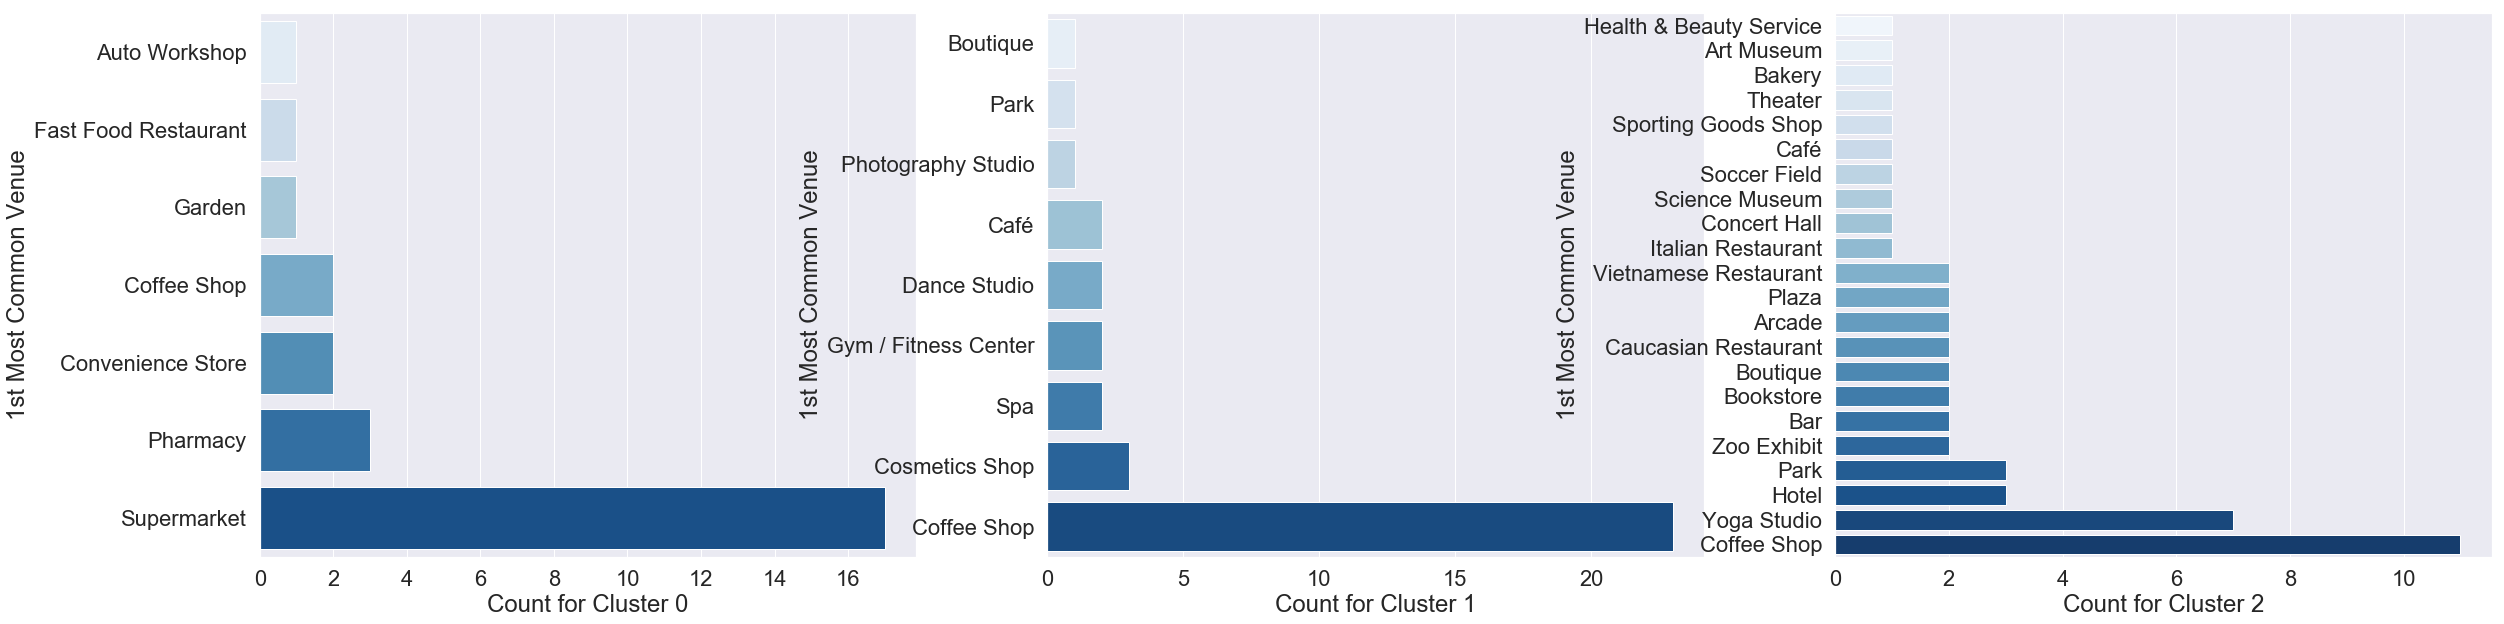

In [71]:
fig, axes = plt.subplots(1,3, figsize=(40,10), sharey=False)

for i in range(0,3):
    cl=md_merged.loc[md_merged['Cluster Labels']==i, md_merged.columns[[0]+list(range(3,md_merged.shape[1]))]].reset_index()
    total_count=cl.count()[0]
    cl=cl.groupby('1st Most Common Venue', axis=0).count().reset_index()
    cl=cl.sort_values(by=['index'])
    ax=sns.barplot(x="index",y="1st Most Common Venue", data=cl, palette="Blues", ax=axes[i])
    ax.set(xlabel='Count for Cluster ' + str(i), ylabel='1st Most Common Venue')

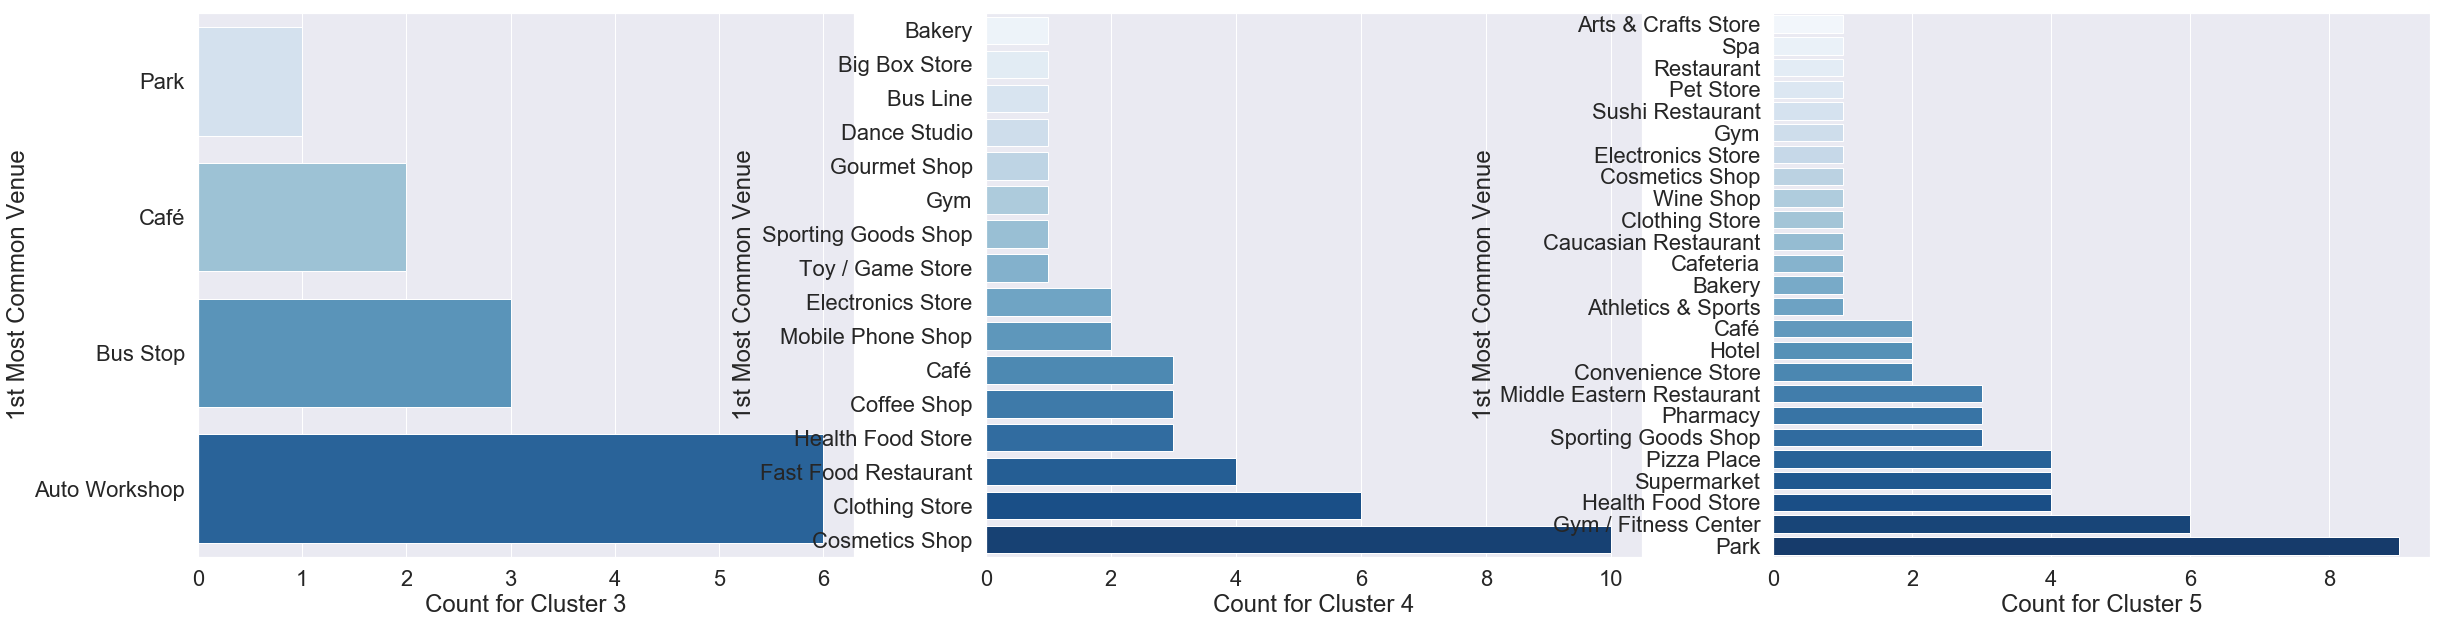

In [72]:
fig, axes = plt.subplots(1,3, figsize=(40,10), sharey=False)

for i in range(3,6):
    cl=md_merged.loc[md_merged['Cluster Labels']==i, md_merged.columns[[0]+list(range(3,md_merged.shape[1]))]].reset_index()
    total_count=cl.count()[0]
    cl=cl.groupby('1st Most Common Venue', axis=0).count().reset_index()
    cl=cl.sort_values(by=['index'])
    ax=sns.barplot(x="index",y="1st Most Common Venue", data=cl, palette="Blues", ax=axes[i-3])
    ax.set(xlabel='Count for Cluster ' + str(i), ylabel='1st Most Common Venue')

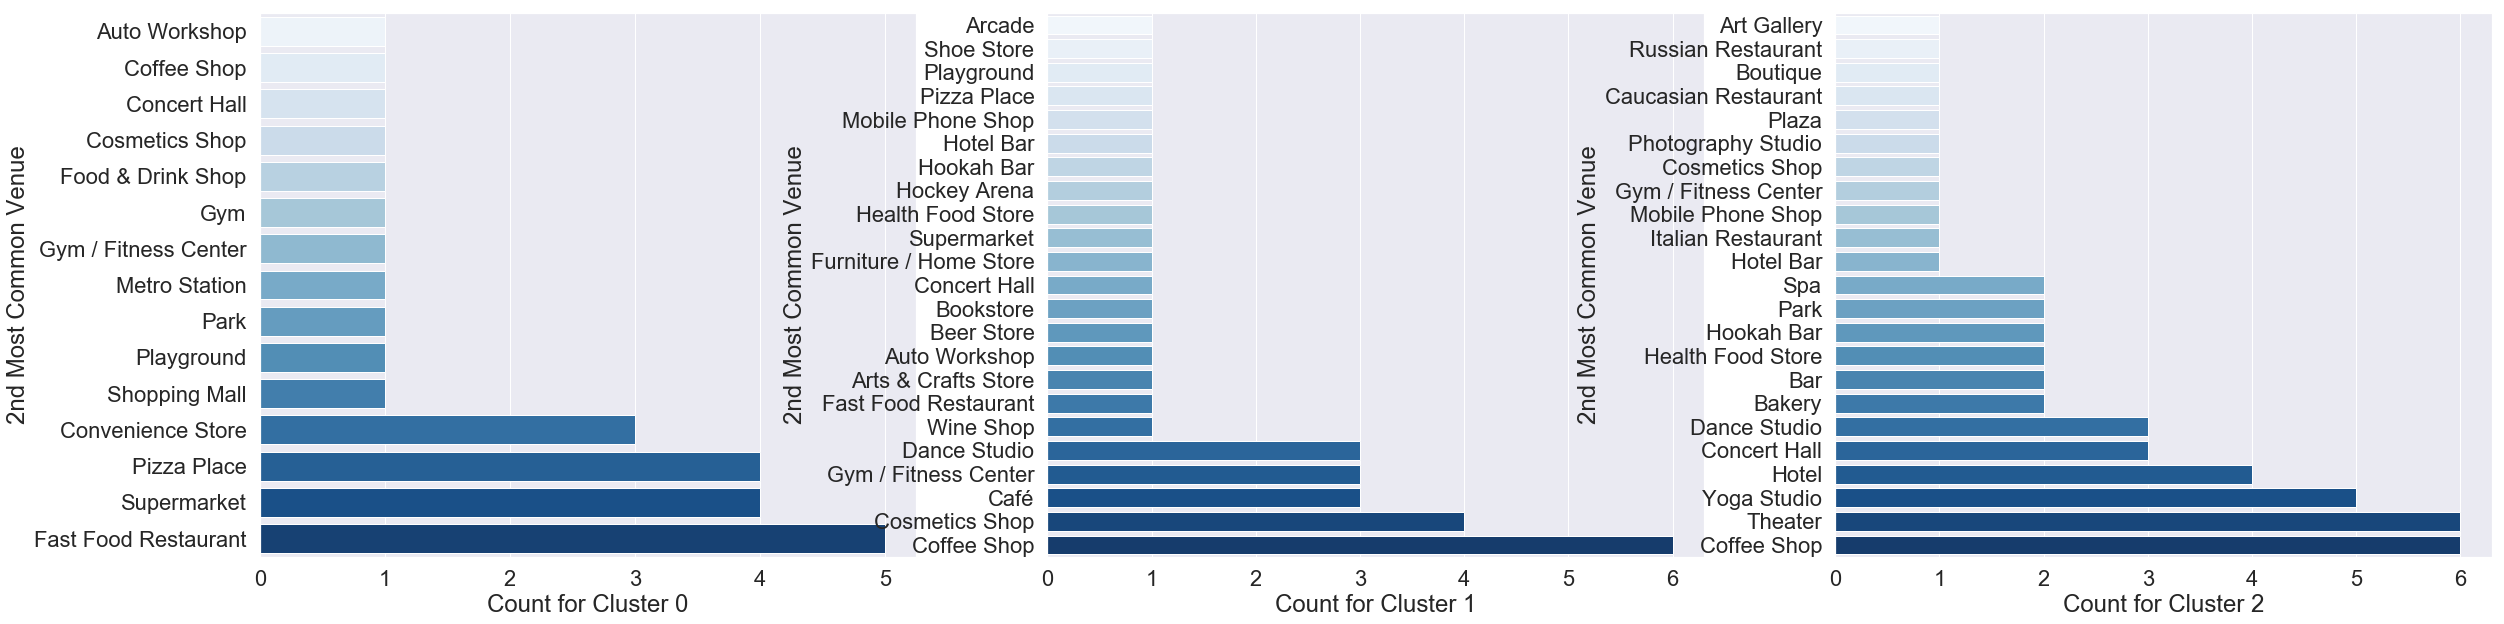

In [73]:
fig, axes = plt.subplots(1,3, figsize=(40,10), sharey=False)

for i in range(0,3):
    cl=md_merged.loc[md_merged['Cluster Labels']==i, md_merged.columns[[0]+list(range(3,md_merged.shape[1]))]].reset_index()
    total_count=cl.count()[0]
    cl=cl.groupby('2nd Most Common Venue', axis=0).count().reset_index()
    cl=cl.sort_values(by=['index'])
    ax=sns.barplot(x="index",y="2nd Most Common Venue", data=cl, palette="Blues", ax=axes[i])
    ax.set(xlabel='Count for Cluster ' + str(i), ylabel='2nd Most Common Venue')
    

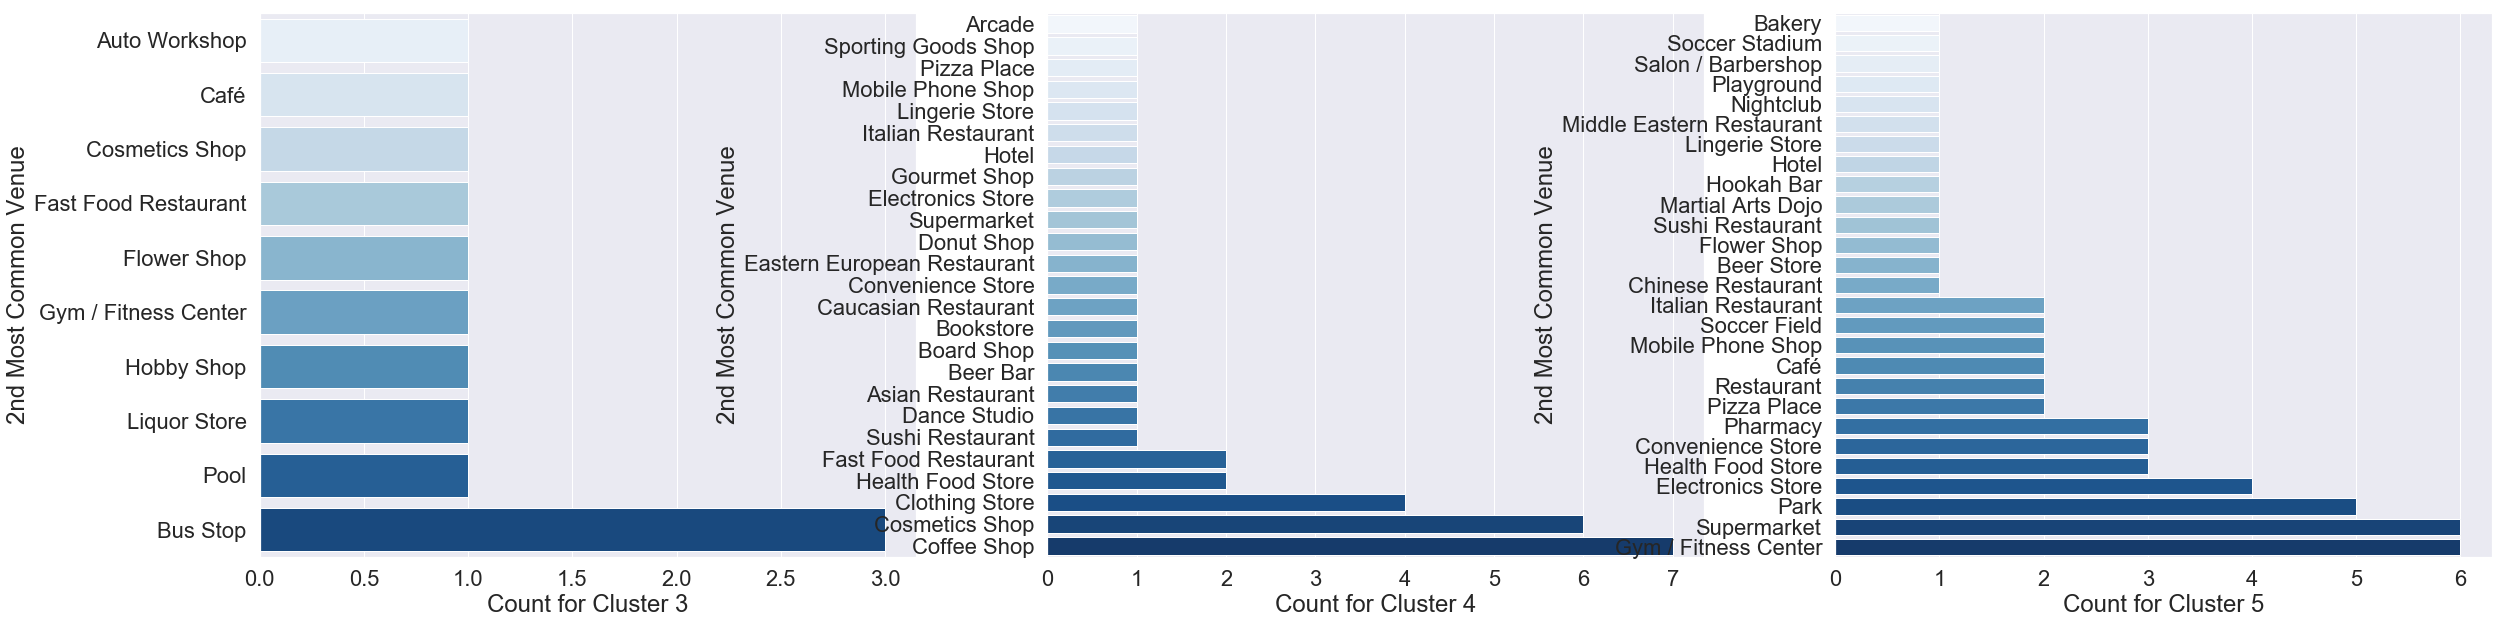

In [74]:
fig, axes = plt.subplots(1,3, figsize=(40,10), sharey=False)

for i in range(3,6):
    cl=md_merged.loc[md_merged['Cluster Labels']==i, md_merged.columns[[0]+list(range(3,md_merged.shape[1]))]].reset_index()
    total_count=cl.count()[0]
    cl=cl.groupby('2nd Most Common Venue', axis=0).count().reset_index()
    cl=cl.sort_values(by=['index'])
    ax=sns.barplot(x="index",y="2nd Most Common Venue", data=cl, palette="Blues", ax=axes[i-3])
    ax.set(xlabel='Count for Cluster ' + str(i), ylabel='2nd Most Common Venue')


* Cluster 0 is a living area that is far away from the center of Moscow. It is surrounded mostly by supermarkets, pharmacies. Most likely new residential neighborhoods with developing infrastructure.
* Cluster 1 is a business area. It is full of entertainments such as gym, SPA, and lots of coffee shops 
* Cluster 2 is not only geographical center of Moscow, but also cultural and shopping center. It attracts tons of tourists and locals. It is surrounded by hotels, restaurants, coffee shops and historical sights
* Cluster 3 is most likely industrial area. Less venue categories, mostly auto repair shops.
* Cluster 4 is a local business area surrounded by mostly local cosmetic, and clothing stores
* Cluster 5 is a mix of local business and residential area. It has good infrastructure and mostly surrounded by parks, gyms, fitness centers, and restaurants

Thank you! - Sargylana Skrybykina